# First tests of inference methods on the epidemiology problem

In [47]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## Data

In [54]:
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
methods = ['maf', 'scandal']
method_labels = ['MAF', 'SCANDAL']

In [55]:
expected_log_likelihoods = []
log_likelihood_mses = []
roc_aucs = []

log_likelihood_reference = np.load('../data/results/epidemiology/scandal/epidemiology_scandal_log_p_hat.npy')

for method in methods:
    log_likelihood_mses_this_method = []
    roc_aucs_this_method = []
    expected_log_likelihoods_this_method = []
    
    for sample_size in sample_sizes:
        log_likelihood = np.load('../data/results/epidemiology/' + method
                                 + '/epidemiology_' + method + '_trainingsamplesize_'
                                 + str(sample_size) + '_train_log_p_hat.npy')
        print(sample_size, np.mean(log_likelihood))
        roc_auc = np.load('../data/results/epidemiology/' + method
                          + '/epidemiology_' + method + '_trainingsamplesize_' + str(sample_size)
                          + '_roc_auc_surrogate_vs_simulator.npy')
        
        try:
            mse = mean_squared_error(log_likelihood_reference, log_likelihood)
        except ValueError:
            mse = np.nan
        expected_log_likelihood = 1. / log_likelihood.shape[0] * np.sum(log_likelihood)
        
        expected_log_likelihoods_this_method.append(expected_log_likelihood)
        roc_aucs_this_method.append(roc_auc)
        log_likelihood_mses_this_method.append(mse)
        
    log_likelihood_mses.append(log_likelihood_mses_this_method)
    roc_aucs.append(roc_aucs_this_method)
    expected_log_likelihoods.append(expected_log_likelihoods_this_method)
    
expected_log_likelihoods = np.array(expected_log_likelihoods)
log_likelihood_mses = np.array(log_likelihood_mses)
roc_aucs = np.array(roc_aucs)


100 -198.6175365709387
200 -273.36758221008307
500 -55.999712228939615
1000 -80.47731382940263
2000 -60.371255927581565
5000 -263.81387294180837
10000 -77.18009149069007
20000 -2.6783393314598372e+45
50000 -3.366079082130528e+25
100 -366.62434780772793
200 -227.6391967470476
500 -146.8871403519613
1000 -72.30504272947813
2000 -144.9316187786665
5000 -983.3303008813023
10000 -101.02061299180983
20000 -inf
50000 -inf


In [51]:
log_likelihood_mses

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [52]:
roc_aucs

array([[[0.99999996],
        [0.9999797 ],
        [0.9999887 ],
        [0.99998997],
        [0.99997063],
        [1.        ],
        [0.9999555 ],
        [1.        ],
        [1.        ]],

       [[0.99998978],
        [0.9999897 ],
        [0.99997782],
        [0.99997783],
        [0.99998856],
        [0.99997962],
        [1.        ],
        [0.9999886 ],
        [0.999999  ]]])

## Plot sample size vs performance

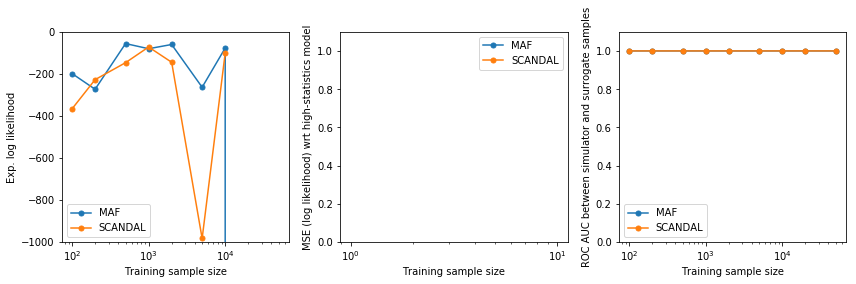

In [53]:
fig = plt.figure(figsize=(12,4))



ax = plt.subplot(1,3,1)

for m, method in enumerate(method_labels):
    plt.plot(sample_sizes, expected_log_likelihoods[m],
             lw=1.5, ls='-', marker='o', ms=5.,
             label=method)
    
    plt.legend()
    
    plt.xlabel('Training sample size')
    plt.ylabel('Exp. log likelihood')
    plt.ylim(-1000.,0.)
    ax.set_xscale("log", nonposx='clip')



ax = plt.subplot(1,3,2)

for m, method in enumerate(method_labels):
    plt.plot(sample_sizes, log_likelihood_mses[m],
             lw=1.5, ls='-', marker='o', ms=5.,
             label=method)
    
    plt.legend()
    
    plt.xlabel('Training sample size')
    plt.ylabel('MSE (log likelihood) wrt high-statistics model')
    plt.ylim(0.,1.1)
    ax.set_xscale("log", nonposx='clip')



ax = plt.subplot(1,3,3)

for m, method in enumerate(method_labels):
    plt.plot(sample_sizes, roc_aucs[m],
             lw=1.5, ls='-', marker='o', ms=5.,
             label=method)
    
    plt.legend()
    
    plt.xlabel('Training sample size')
    plt.ylabel('ROC AUC between simulator and surrogate samples')
    plt.ylim(0.,1.1)
    ax.set_xscale("log", nonposx='clip')
    
    

plt.tight_layout()
plt.show()
